## Introduction

This study aims to analyze the data on Gross Domestic Product (GDP) and life expectancy provided by the World Health Organization and the World Bank. The analysis will focus on examining the potential relationships between these two variables across six countries. The data will be carefully examined to identify any correlations or patterns that may exist between GDP and life expectancy. By conducting this study, we hope to gain a deeper understanding of the complex relationship between these important socioeconomic indicators.

**Questions that will be answered:**

+ Is there a correlation between a country's GDP and life expectancy?
+ Which country has the highest GDP and life expectancy, and how do they compare to the other countries in the analysis?


**Data Sources**

+ GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.

+ Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)


## Import Python Modules

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

### Loading the Data

Firstly we need to load the data. The dataset named $all\_data.csv$ contains information about GDP and life expectancy of 6 countries. The csv file will be load as a Data Frame named $data$.

In [2]:
data = pd.read_csv('all_data.csv')

data.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


### EDA

Primarly, we will check general information about the Data Frame. We can see there are 96 entires without null values

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


We can also see that the 6 different countries are: Chile, China, Germany, Mexico, USA and Zimbabwe. The selections of countries makes a representation from each continent.

In [4]:
print(data.Country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


Also, we can see data from 2000 to 2015, which is also relevant information aas there are 15 yearas.

In [5]:
print(data.Year.unique())

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


#### Columns Names

Looking for a eficiency the `rename` function will be used to change the 3th column's name. It will change from `Life expectancy at birth (years)`to `Life_exp`.

In [6]:
data = data.rename({"Life expectancy at birth (years)":"Life_exp"}, axis = "columns")
data.head()

,Country,Year,Life_exp,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


#### Data Normalization

Given the scale disparity between the numerical variables, it is advisable to perform data normalization to facilitate better understanding of the comparison between these variables. Normalization will also aid in visualizing the relationships between these variables in a more meaningful manner. By normalizing the data, the variable values will be transformed to a common scale, allowing for a more accurate analysis of their relationships and reducing the impact of any scaling differences on the statistical conclusions drawn from the data.

There are different methos to normalize data. In this case the [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) method from **scikit-learn** was used.

In [25]:
# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Select the columns to normalize
cols_to_normalize = ["GDP", "Life_exp"]

# Normalize the selected columns
data[cols_to_normalize] = scaler.fit_transform(data[cols_to_normalize])

# Print the normalized data
data.head()


,Country,Year,Life_exp,GDP
0,Chile,2000,0.899183,0.004059
1,Chile,2001,0.899183,0.003678
2,Chile,2002,0.912807,0.003610
3,Chile,2003,0.915531,0.003936
4,Chile,2004,0.918256,0.005239


#### Graphic Data Exploration

##### Scatter Plot

In the following chart, we observe a similar pattern as in the previous charts, where the `GDP` for Zimbabwe remains relatively stable, while the `Life_exp` increases over time. In contrast, for the other countries, there appears to be a positive correlation between `GDP` and `Life_exp`, with increasing `GDP` corresponding to higher `Life_exp`. Notably, the United States and China display similar slopes in the relationship between `GDP` and life expectancy, implying a similar relationship between these variables in these two countries. These observations suggest the need for further investigation into the factors influencing the relationship between `GDP` and life expectancy in different countries.

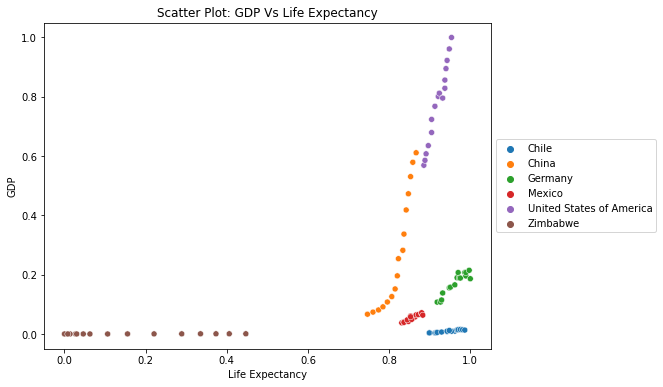

In [39]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=data.Life_exp, y=data.GDP, hue=data.Country).legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1);
plt.title('Scatter Plot: GDP Vs Life Expectancy')
plt.xlabel('Life Expectancy')
plt.show()

##### Histogram Plots

Upon examining the histogram of GDP values, it becomes apparent that the distribution is skewed to the right, which suggests the possibility of the presence of outliers in the dataset. This observation highlights the need for further investigation into the extreme values in the distribution to determine their impact on the statistical analysis and conclusions that can be drawn from the data.

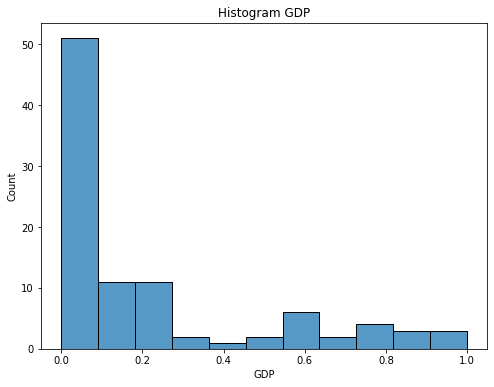

In [27]:
plt.figure(figsize=(8,6))
sns.histplot(data=data, x="GDP")
plt.title('Histogram GDP')
plt.show()

Upon analyzing the histogram of life expectancy values, it becomes evident that the distribution is skewed to the left, which implies the presence of potential outliers in the data. This finding underscores the importance of investigating the lower end of the distribution to determine the impact of any extreme values on the statistical analysis and conclusions that can be drawn from the data.

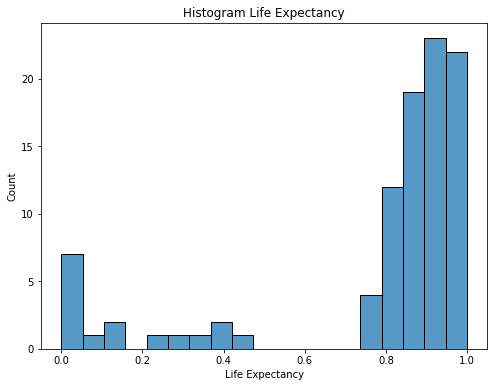

In [28]:
plt.figure(figsize=(8,6))
sns.histplot(data=data, x="Life_exp")
plt.title('Histogram Life Expectancy')
plt.xlabel('Life Expectancy')
plt.show()

#### Line Charts

The next step in the data analysis involves visualizing the trends of `GDP` and `Life_exp` over time using line charts. In these charts, the countries will be distinguished by different colors, allowing for a clear comparison of their respective trajectories. Upon inspection of the charts, it is evident that the United States and China experienced significant growth in `GDP` between the years 2000 and 2015. China, in particular, witnessed a remarkable increase in its `GDP`, surging from less than a quarter of a trillion dollars to one trillion dollars during this period. Such a significant increase in GDP was not observed in the other countries under examination.

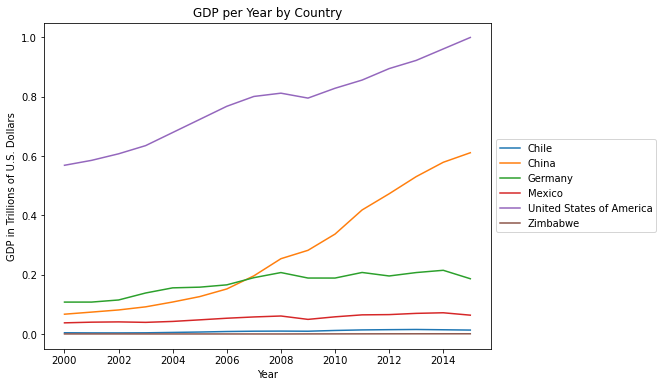

In [46]:
plt.figure(figsize = (8,6))
sns.lineplot(x = data.Year, y = data.GDP, hue = data.Country)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title('GDP per Year by Country')
plt.ylabel("GDP in Trillions of U.S. Dollars");

The following chart depicts the trends in life expectancy over time across the different countries under study. The chart highlights a general increase in life expectancy across all countries, with Zimbabwe exhibiting the most notable gains, particularly following a slight decline around 2004. This finding underscores the importance of examining the underlying factors responsible for the observed increase in life expectancy in Zimbabwe, which may have important implications for public health and policy decisions in the country.

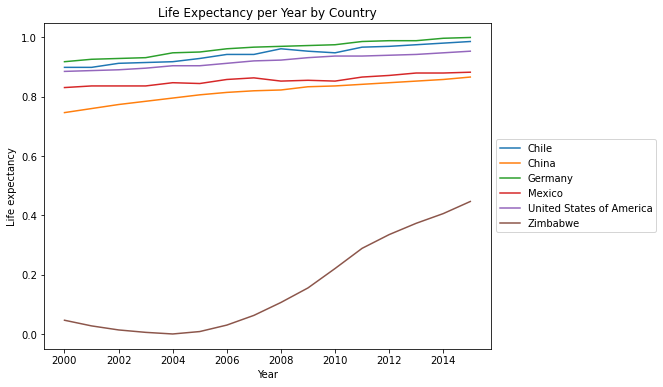

In [45]:
plt.figure(figsize = (8,6))
sns.lineplot(x = data.Year, y = data.Life_exp, hue = data.Country)
plt.legend(loc ='center left', bbox_to_anchor = (1, 0.5), ncol = 1)
plt.title('Life Expectancy per Year by Country')
plt.ylabel("Life expectancy");


### Solution

#### Is there a correlation between a country's GDP and life expectancy?

There appears to be a notable correlation between Gross Domestic Product (GDP) and life expectancy, as evidenced by the analysis of six countries. Specifically, in Mexico, Germany, and Chile, there is an observable trend of a nearly linear relationship between GDP and life expectancy. However, the pattern of behavior is distinct in the cases of China, USA, and Zimbabwe.

#### Which country has the highest GDP and life expectancy, and how do they compare to the other countries in the analysis?

Notably, life expectancy in all countries, except Zimbabwe, appears to be relatively consistent. Nevertheless, the United States stands out for its significantly higher GDP compared to the other countries under analysis. Further investigation into China's data is warranted, particularly in light of their marked surge in GDP around 2008. Similarly, a thorough examination of Zimbabwe's data is recommended given the country's considerably lower values in comparison to the other nations.

### Conclusions

+ A positive correlation between GDP and life expectancy is evident in Mexico, Germany, and Chile, suggesting that higher GDPs may contribute to better health outcomes in these countries.


+ The United States has a notably higher GDP than the other nations examined, yet its life expectancy is similar to that of other countries, indicating that factors beyond GDP may influence life expectancy.


+ The sudden increase in China's GDP around 2008 warrants further investigation, as it may have had a notable impact on life expectancy trends in the country. Additionally, Zimbabwe's data highlights the need to address health disparities in countries with lower GDPs to improve life expectancy outcomes.

### Further Research

+ What specific factors beyond GDP may contribute to disparities in life expectancy outcomes between countries with similar GDP levels? Are there other socio-economic or cultural factors that should be considered?


+ How has the rapid increase in China's GDP around 2008 impacted overall health outcomes in the country, and what policies or interventions could be implemented to improve health outcomes moving forward?